Unique target values before encoding: [0 1 2 3]
Unique target values after encoding: [0 1 2 3]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:23:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


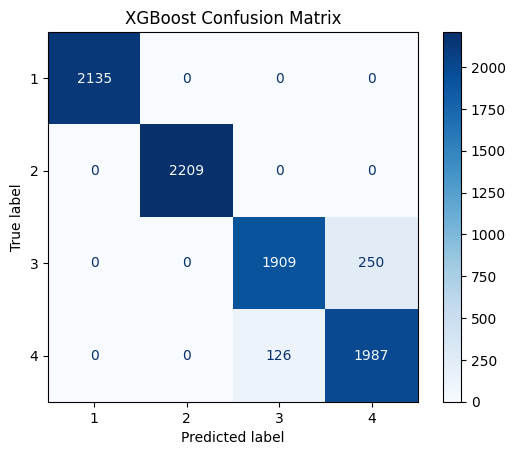

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2135
           2       1.00      1.00      1.00      2209
           3       0.94      0.88      0.91      2159
           4       0.89      0.94      0.91      2113

    accuracy                           0.96      8616
   macro avg       0.96      0.96      0.96      8616
weighted avg       0.96      0.96      0.96      8616



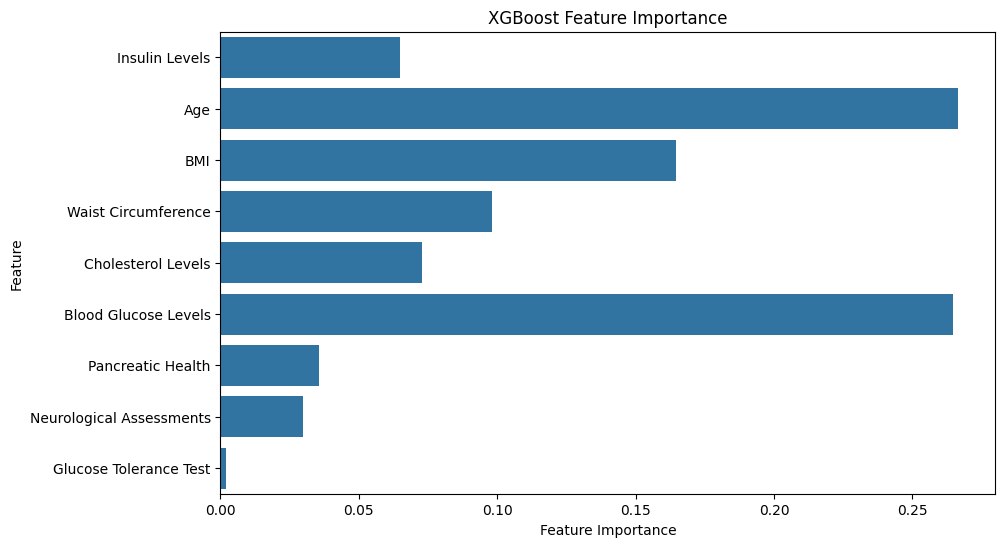

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:24:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:24:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:24:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:24:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:24:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weigh

Cross-validation scores: [0.95102198 0.95796375 0.94986502 0.95410721 0.95679012]
Mean CV Accuracy: 0.9539496174410689


<Figure size 2000x1000 with 0 Axes>

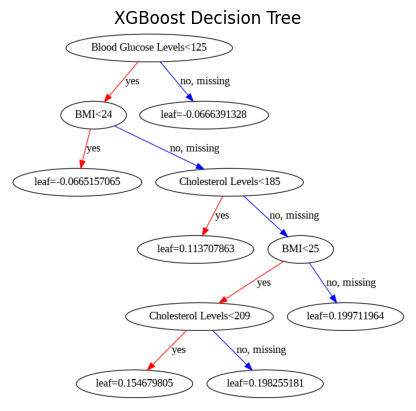

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

data_path = 'data.csv'
data = pd.read_csv(data_path)

# Inspect the unique values in the target column
print("Unique target values before encoding:", data['Target'].unique())

# Inspect the target values after correction
print("Unique target values after encoding:", data['Target'].unique())

# Feature-target separation
X = data.drop(columns=['Target'])  # Drop the target column
y = data['Target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

xgb_params = {
    'n_estimators': 96,           # Number of trees
    'max_depth': 6,               # Maximum depth of trees
    'min_child_weight': 100,      # Minimum sum of weights of child nodes (approx. min_samples_split)
    'subsample': 0.8,             # Fraction of samples used (similar to bootstrap=True)
    'colsample_bytree': 0.8,      # Fraction of features used per tree (similar to max_features='sqrt')
    'learning_rate': 0.1,         # Learning rate
    'scale_pos_weight': 1,        # Balance positive/negative classes (adjust for imbalance if needed)
    'eval_metric': 'mlogloss',    # Use multi-class log loss
    'random_state': 42            # Reproducibility
}

# Apply SMOTE (resample the training set to balance the classes)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize XGBoost classifier with specified parameters
xgb = XGBClassifier(**xgb_params)

xgb.fit(X_train_res, y_train_res)

# Predict on test data
y_pred = xgb.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['1', '2', '3', '4'])
cmd.plot(cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred, target_names=['1', '2', '3', '4']))

# Feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb.feature_importances_, y=X.columns)
plt.title("XGBoost Feature Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

cv_scores = cross_val_score(xgb, X_train_res, y_train_res, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# ======================= PLOTTING ================================== #

from xgboost import plot_tree

# Plot a single tree from the XGBoost model
plt.figure(figsize=(20, 10))
plot_tree(xgb, num_trees=0)  # Change num_trees to view a specific tree
plt.title("XGBoost Decision Tree")
plt.show()

# Calculate the class probabilities for the test set
y_proba = xgb.predict_proba(X_test)

# Compute the average probability for each class
avg_class_proba = np.mean(y_proba, axis=0)

# ========================== FUNNEL =========================================

# Create a DataFrame to collect all tree statistics
#tree_depths = []
#average_gains = []
#
## Iterate through each tree in the XGBoost model
#for tree in booster.get_dump(with_stats=True):
#    max_depth = 0
#    total_gain = 0
#    node_count = 0
#
#    for line in tree.split('\n'):
#        if line.strip():
#            depth = line.count('\t')  # Tree depth based on tab levels
#            max_depth = max(max_depth, depth)
#            if "gain=" in line:
#                gain = float(line.split("gain=")[1].split(",")[0])
#                total_gain += gain
#                node_count += 1
#
#    # Append statistics for this tree
#    tree_depths.append(max_depth)
#    average_gains.append(total_gain / node_count if node_count > 0 else 0)
